## Extracting and Visualizing Stock Data

In [5]:
import pandas as pd
import numpy as np
import yfinance as yf
import requests
from bs4 import BeautifulSoup

import plotly.graph_objects as go
from plotly.subplots import make_subplots

### Define Graphing Function

In [6]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

### 1: Use yfinance to Extract Stock Data
Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [7]:
tesla = yf.Ticker('TSLA')

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.

In [8]:
tesla_data = tesla.history(period='max')

**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [9]:
tesla_data.reset_index(inplace=True)

<Axes: xlabel='Date'>

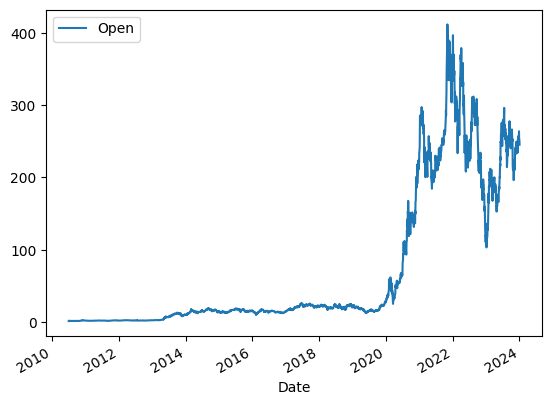

In [11]:
tesla_data.plot(x='Date', y='Open')

### 2: Use Webscraping to Extract Tesla Revenue Data

Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [13]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

html_data = requests.get(url).text

Parse the html data using `beautiful_soup`.


In [14]:
soup = BeautifulSoup(html_data, 'html.parser')

Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


In [15]:
tesla_revenue = pd.DataFrame(columns = ['Date', 'Revenue'])

In [18]:
type(tesla_revenue)

pandas.core.frame.DataFrame

In [29]:
tesla_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

for table in soup.find_all('table'):
    if 'Tesla Quarterly Revenue' in table.find('th').text:
        
        for row in table.find_all('tr'):
            col = row.find_all('td')
            if (col != []):
                Date = col[0].text
                Revenue = col[1].text
                tesla_revenue.loc[len(tesla_revenue)] = [Date, Revenue]

In [31]:
tesla_revenue.head()

,Date,Revenue
0,2022-09-30,"$21,454"
1,2022-06-30,"$16,934"
2,2022-03-31,"$18,756"
3,2021-12-31,"$17,719"
4,2021-09-30,"$13,757"


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [42]:
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace(',', '').replace('$', '')

In [43]:
tesla_revenue.head()

,Date,Revenue
0,2022-09-30,21454
1,2022-06-30,16934
2,2022-03-31,18756
3,2021-12-31,17719
4,2021-09-30,13757


Execute to remove an null or empty strings in the Revenue column.

In [44]:
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != '']

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [46]:
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


In [91]:
tesla_revenue.shape

(53, 2)

### Question 3: Use yfinance to Extract Stock Data
Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.

In [48]:
gme = yf.Ticker('GME')

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [49]:
gme_data = gme.history(period='max')

**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function.

In [50]:
gme_data.reset_index(inplace=True)

In [51]:
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693349,1.603295,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


### Question 4: Use Webscraping to Extract GME Revenue Data

Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data`.

In [53]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

html_data = requests.get(url).text

Parse the html data using `beautiful_soup`.

In [54]:
soup = BeautifulSoup(html_data, 'html.parser')

Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column using a method similar to what you did in Question 2.

In [59]:
gme_revenue= pd.DataFrame(columns = ['Date', 'Revenue'])

In [82]:
for table in soup.find_all('table'):
    if 'GameStop Quarterly Revenue' in table.find('th').text:
        rows = table.find_all('tr')
        for row in rows:
            col = row.find_all('td')
        
            if col != []:
                Date = col[0].text
                Revenue = col[1].text
                gme_revenue.loc[len(gme_revenue)] = [Date, Revenue]

gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace(',', '').str.replace('$', '')

Display the last five rows of the `gme_revenue` dataframe using the `tail` function.

In [88]:
gme_revenue.tail()

,Date,Revenue
553,2006-01-31,1667
554,2005-10-31,534
555,2005-07-31,416
556,2005-04-30,475
557,2005-01-31,709


### Question 5: Plot Tesla Stock Graph
Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`.

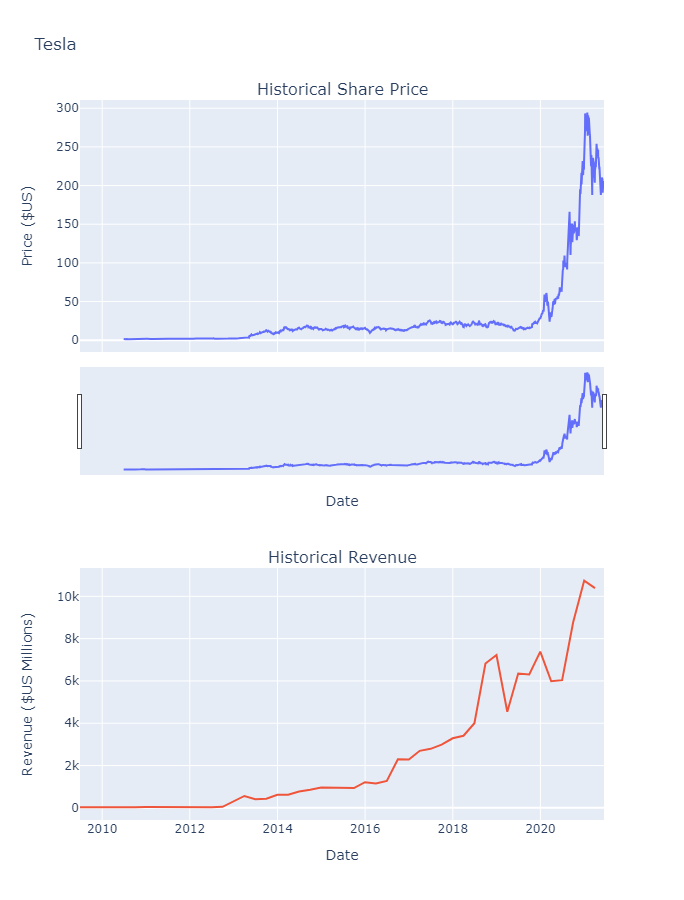

In [97]:
import warnings
warnings.filterwarnings("ignore")

# The argument 'infer_datetime_format' is deprecated and will be removed in a future version

make_graph(tesla_data[['Date', 'Close']], tesla_revenue, 'Tesla')

### Question 6: Plot GameStop Stock Graph
Use the make_graph function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the make_graph function is make_graph(gme_data, gme_revenue, 'GameStop'). Note the graph will only show data upto June 2021.

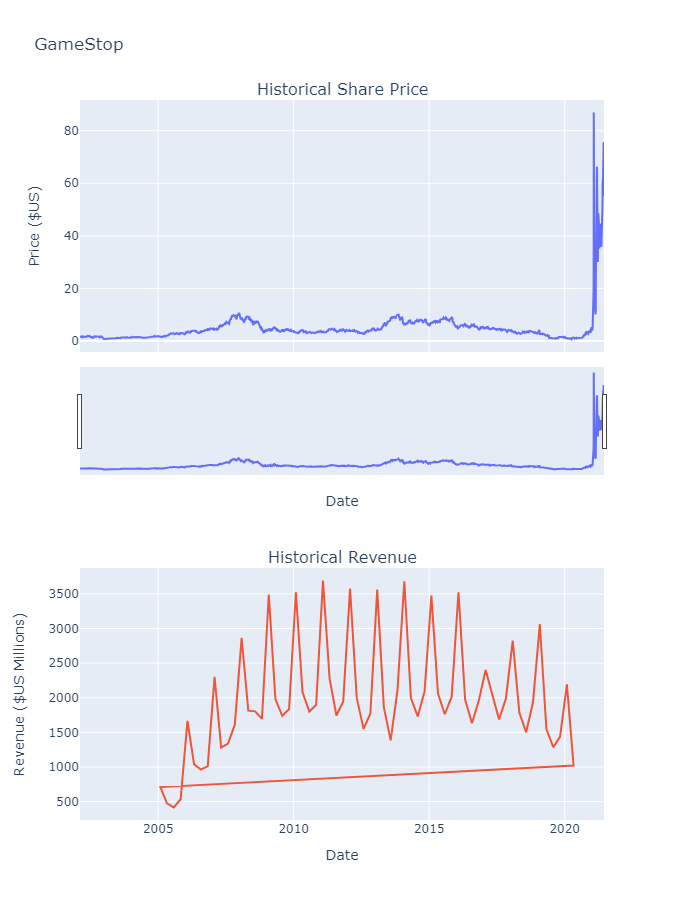

In [98]:
make_graph(gme_data[['Date', 'Close']], gme_revenue, 'GameStop')

### Thank you
## Author

[Neelesh Chidar](https://www.linkedin.com/in/neeleshchidar37/)

####  Special Thanks to IBM Skills Network team for content